In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = "VD_Regression-Chuan hoa.csv"
df = pd.read_csv(path)

In [3]:
df.head()


,STT,LOAI XE,NAm SX,Tuoi xe,So KM,so km( van),GIA BAN (trieu dong),Gia ban(tram trieu dong)
0,1,Navara,2015,5,63000,6.3000,568,5.68
1,2,Navara,2016,4,19253,1.9253,470,4.70
2,3,Navara,2012,8,150000,15.0000,325,3.25
3,4,Navara,2017,3,45000,4.5000,539,5.39
4,5,Navara,2016,4,40000,4.0000,499,4.99


In [4]:
df.describe()

,STT,NAm SX,Tuoi xe,So KM,so km( van),GIA BAN (trieu dong),Gia ban(tram trieu dong)
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,2015.653465,4.346535,51619.009901,5.161901,499.089109,4.990891
std,29.300171,2.085357,2.085357,61474.958287,6.147496,95.015693,0.950157
min,1.000000,2011.000000,1.000000,0.000000,0.000000,307.000000,3.070000
25%,26.000000,2014.000000,3.000000,18000.000000,1.800000,415.000000,4.150000
50%,51.000000,2016.000000,4.000000,41235.000000,4.123500,518.000000,5.180000
75%,76.000000,2017.000000,6.000000,63000.000000,6.300000,568.000000,5.680000
max,101.000000,2019.000000,9.000000,380000.000000,38.000000,705.000000,7.050000


In [5]:
%matplotlib inline

In [6]:
del df['STT']

In [7]:
median = df['so km( van)'].median()

In [8]:
x_data = df.values[:,2:4]

In [9]:
x_data

array([[5, 63000],
       [4, 19253],
       [8, 150000],
       [3, 45000],
       [4, 40000],
       [3, 43000],
       [3, 19000],
       [7, 65000],
       [1, 30000],
       [2, 19000],
       [2, 15000],
       [5, 85000],
       [6, 86000],
       [7, 70000],
       [5, 45000],
       [4, 70000],
       [3, 45000],
       [3, 33000],
       [7, 55000],
       [3, 45000],
       [4, 80000],
       [2, 38000],
       [7, 80000],
       [4, 53000],
       [8, 150000],
       [2, 25000],
       [2, 9000],
       [2, 16000],
       [2, 25000],
       [3, 40000],
       [7, 118000],
       [5, 45000],
       [6, 60000],
       [3, 19000],
       [2, 12000],
       [3, 30000],
       [4, 42000],
       [7, 6000],
       [4, 42000],
       [3, 28000],
       [4, 61000],
       [3, 26000],
       [2, 14000],
       [4, 53000],
       [7, 65000],
       [8, 150000],
       [7, 65000],
       [2, 9000],
       [4, 32000],
       [3, 12000],
       [7, 90000],
       [4, 41235],
       [8, 

In [10]:
y_data = df.values[:,4:5]

In [11]:
y_data

array([[6.3],
       [1.9253],
       [15.0],
       [4.5],
       [4.0],
       [4.3],
       [1.9],
       [6.5],
       [3.0],
       [1.9],
       [1.5],
       [8.5],
       [8.6],
       [7.0],
       [4.5],
       [7.0],
       [4.5],
       [3.3],
       [5.5],
       [4.5],
       [8.0],
       [3.8],
       [8.0],
       [5.3],
       [15.0],
       [2.5],
       [0.9],
       [1.6],
       [2.5],
       [4.0],
       [11.8],
       [4.5],
       [6.0],
       [1.9],
       [1.2],
       [3.0],
       [4.2],
       [0.6],
       [4.2],
       [2.8],
       [6.1],
       [2.6],
       [1.4],
       [5.3],
       [6.5],
       [15.0],
       [6.5],
       [0.9],
       [3.2],
       [1.2],
       [9.0],
       [4.1235],
       [1.5],
       [4.5],
       [0.9],
       [3.5],
       [4.5],
       [1.0],
       [0.0],
       [0.2436],
       [8.5],
       [5.1238],
       [0.0],
       [1.8],
       [6.0],
       [8.8],
       [0.0],
       [1.9],
       [3.8],
       [1.9],
    

In [13]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [14]:
x = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [15]:
w = tf.Variable(tf.ones([n_dim, 1]))

b = tf.Variable(np.random.randn(), dtype = tf.float32)

In [16]:
pred = tf.add(tf.matmul(x, w), b)

In [17]:
loss = tf.reduce_mean(tf.square(pred - y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
sess = tf.Session()

In [20]:
# Training
sess.run(init)
epochs = 5000

loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict ={x: x_train, y: y_train})
    
    test_loss = sess.run(loss, feed_dict={x: x_test, y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 500 == 0:
        print("epoch {} Test loss = {}".format(epoch, test_loss))
        
print("training finished")

epoch 0 Test loss = 5.08157716320538e+25
epoch 500 Test loss = nan
epoch 1000 Test loss = nan
epoch 1500 Test loss = nan
epoch 2000 Test loss = nan
epoch 2500 Test loss = nan
epoch 3000 Test loss = nan
epoch 3500 Test loss = nan
epoch 4000 Test loss = nan
epoch 4500 Test loss = nan
training finished


In [21]:
sess.run(w)

array([[nan],
       [nan]], dtype=float32)

In [22]:
sess.run(b)

nan

ValueError: Axis limits cannot be NaN or Inf

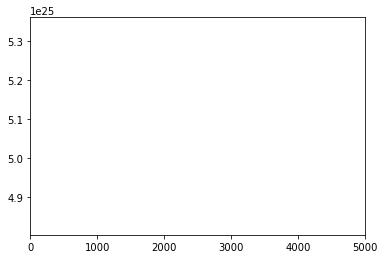

In [23]:

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [ ]:
pred_y = sess.run(pred, feed_dict = {
    x : [[4, 5],]
})

In [ ]:
print(pred_y)

In [ ]:
#testtt
2*(-0.38027936)+0.9*(-0.00848708)